## Notebook for OSAA master data wrangling

In [22]:
#import pandas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [6]:
#read dataframe
df = pd.read_csv(r'C:\Users\mafiz\United Nations\OSAA - Data Repo - Data repo\Conf_data\GitHub\OSAAReferenceData\World_country_conf_csv.csv')
df.head()

,ID_Country_iso2Code,ID_Country_iso3Code,ID_Country_numeric_M49,Country,Region,Region_gen,African_sub_region,region_iso3Code,region_iso2code,incomeLevel,...,lendingType_iso3Code,lendingType_iso2code,capitalCity,longitude,latitude,OECD member,Arab states,Small_state,Fragile and Conflict-Affected Situations,Heavily indebted poor countries (HIPC)
0,AF,AFG,4.0,Afghanistan,South Asia,South Asia,NaN,SAS,8S,Low income,...,IDX,XI,Kabul,69.17610,34.5228,No,No,No,Fragile and Conflict-Affected Situations,HIPC
1,AL,ALB,8.0,Albania,Europe & Central Asia,Europe & Central Asia,NaN,ECS,Z7,Upper middle income,...,IBD,XF,Tirane,19.81720,41.3317,No,No,No,No,No
2,DZ,DZA,12.0,Algeria,Africa,Middle East & North Africa,Northern Africa,MEA,ZQ,Lower middle income,...,IBD,XF,Algiers,3.05097,36.7397,No,Arab,No,No,No
3,AS,ASM,16.0,American Samoa,East Asia & Pacific,East Asia & Pacific,NaN,EAS,Z4,Upper middle income,...,LNX,XX,Pago Pago,-170.69100,-14.2846,No,No,No,No,No
4,AD,AND,20.0,Andorra,Europe & Central Asia,Europe & Central Asia,NaN,ECS,Z7,High income,...,LNX,XX,Andorra la Vella,1.52180,42.5075,No,No,No,No,No


In [7]:
df.columns

Index(['ID_Country_iso2Code', 'ID_Country_iso3Code', 'ID_Country_numeric_M49',
       'Country', 'Region', 'Region_gen', 'African_sub_region',
       'region_iso3Code', 'region_iso2code', 'incomeLevel',
       'incomeLevel_iso3Code', 'incomeLevel_iso2code', 'lendingType',
       'lendingType_iso3Code', 'lendingType_iso2code', 'capitalCity',
       'longitude', 'latitude', 'OECD member', 'Arab states', 'Small_state',
       'Fragile and Conflict-Affected Situations ',
       'Heavily indebted poor countries (HIPC)'],
      dtype='object')

In [8]:
#read conflict dataset
conflict = pd.read_csv(r'C:\Users\mafiz\United Nations\OSAA - Data Repo - Data repo\Conf_data\GitHub\OSAAReferenceData\Conflict, institutionla and social fragility classification 2024.csv', encoding='ISO-8859-1')
conflict.head()

,Country,ISO3 Code,Type
0,Afghanistan,AFG,Conflict
1,Burkina Faso,BFA,Conflict
2,Cameroon,CMR,Conflict
3,Central African Republic,CAF,Conflict
4,"Congo, Democratic Republic of",COD,Conflict


In [9]:
conflict_selected = conflict[['ISO3 Code', 'Type']]
conflict_selected.head()

,ISO3 Code,Type
0,AFG,Conflict
1,BFA,Conflict
2,CMR,Conflict
3,CAF,Conflict
4,COD,Conflict


In [10]:
merged_df = df.merge(conflict_selected, how='left', left_on='ID_Country_iso3Code', right_on='ISO3 Code')
merged_df.head()

,ID_Country_iso2Code,ID_Country_iso3Code,ID_Country_numeric_M49,Country,Region,Region_gen,African_sub_region,region_iso3Code,region_iso2code,incomeLevel,...,capitalCity,longitude,latitude,OECD member,Arab states,Small_state,Fragile and Conflict-Affected Situations,Heavily indebted poor countries (HIPC),ISO3 Code,Type
0,AF,AFG,4.0,Afghanistan,South Asia,South Asia,NaN,SAS,8S,Low income,...,Kabul,69.17610,34.5228,No,No,No,Fragile and Conflict-Affected Situations,HIPC,AFG,Conflict
1,AL,ALB,8.0,Albania,Europe & Central Asia,Europe & Central Asia,NaN,ECS,Z7,Upper middle income,...,Tirane,19.81720,41.3317,No,No,No,No,No,NaN,NaN
2,DZ,DZA,12.0,Algeria,Africa,Middle East & North Africa,Northern Africa,MEA,ZQ,Lower middle income,...,Algiers,3.05097,36.7397,No,Arab,No,No,No,NaN,NaN
3,AS,ASM,16.0,American Samoa,East Asia & Pacific,East Asia & Pacific,NaN,EAS,Z4,Upper middle income,...,Pago Pago,-170.69100,-14.2846,No,No,No,No,No,NaN,NaN
4,AD,AND,20.0,Andorra,Europe & Central Asia,Europe & Central Asia,NaN,ECS,Z7,High income,...,Andorra la Vella,1.52180,42.5075,No,No,No,No,No,NaN,NaN


In [11]:
merged_df.drop(['ISO3 Code'], axis=1, inplace=True)
merged_df.head()

,ID_Country_iso2Code,ID_Country_iso3Code,ID_Country_numeric_M49,Country,Region,Region_gen,African_sub_region,region_iso3Code,region_iso2code,incomeLevel,...,lendingType_iso2code,capitalCity,longitude,latitude,OECD member,Arab states,Small_state,Fragile and Conflict-Affected Situations,Heavily indebted poor countries (HIPC),Type
0,AF,AFG,4.0,Afghanistan,South Asia,South Asia,NaN,SAS,8S,Low income,...,XI,Kabul,69.17610,34.5228,No,No,No,Fragile and Conflict-Affected Situations,HIPC,Conflict
1,AL,ALB,8.0,Albania,Europe & Central Asia,Europe & Central Asia,NaN,ECS,Z7,Upper middle income,...,XF,Tirane,19.81720,41.3317,No,No,No,No,No,NaN
2,DZ,DZA,12.0,Algeria,Africa,Middle East & North Africa,Northern Africa,MEA,ZQ,Lower middle income,...,XF,Algiers,3.05097,36.7397,No,Arab,No,No,No,NaN
3,AS,ASM,16.0,American Samoa,East Asia & Pacific,East Asia & Pacific,NaN,EAS,Z4,Upper middle income,...,XX,Pago Pago,-170.69100,-14.2846,No,No,No,No,No,NaN
4,AD,AND,20.0,Andorra,Europe & Central Asia,Europe & Central Asia,NaN,ECS,Z7,High income,...,XX,Andorra la Vella,1.52180,42.5075,No,No,No,No,No,NaN


In [12]:
merged_df.rename(columns={'Fragile and Conflict-Affected Situations': 'Fragile and Conflict-Affected Situations 2021', 'Type': 'Fragile and Conflict-Affected Situations 2024'}, inplace=True)
merged_df.head()

,ID_Country_iso2Code,ID_Country_iso3Code,ID_Country_numeric_M49,Country,Region,Region_gen,African_sub_region,region_iso3Code,region_iso2code,incomeLevel,...,lendingType_iso2code,capitalCity,longitude,latitude,OECD member,Arab states,Small_state,Fragile and Conflict-Affected Situations,Heavily indebted poor countries (HIPC),Fragile and Conflict-Affected Situations 2024
0,AF,AFG,4.0,Afghanistan,South Asia,South Asia,NaN,SAS,8S,Low income,...,XI,Kabul,69.17610,34.5228,No,No,No,Fragile and Conflict-Affected Situations,HIPC,Conflict
1,AL,ALB,8.0,Albania,Europe & Central Asia,Europe & Central Asia,NaN,ECS,Z7,Upper middle income,...,XF,Tirane,19.81720,41.3317,No,No,No,No,No,NaN
2,DZ,DZA,12.0,Algeria,Africa,Middle East & North Africa,Northern Africa,MEA,ZQ,Lower middle income,...,XF,Algiers,3.05097,36.7397,No,Arab,No,No,No,NaN
3,AS,ASM,16.0,American Samoa,East Asia & Pacific,East Asia & Pacific,NaN,EAS,Z4,Upper middle income,...,XX,Pago Pago,-170.69100,-14.2846,No,No,No,No,No,NaN
4,AD,AND,20.0,Andorra,Europe & Central Asia,Europe & Central Asia,NaN,ECS,Z7,High income,...,XX,Andorra la Vella,1.52180,42.5075,No,No,No,No,No,NaN


In [13]:
merged_df['Fragile and Conflict-Affected Situations 2024'] = merged_df['Fragile and Conflict-Affected Situations 2024'].replace('nan', '')
merged_df.head()

,ID_Country_iso2Code,ID_Country_iso3Code,ID_Country_numeric_M49,Country,Region,Region_gen,African_sub_region,region_iso3Code,region_iso2code,incomeLevel,...,lendingType_iso2code,capitalCity,longitude,latitude,OECD member,Arab states,Small_state,Fragile and Conflict-Affected Situations,Heavily indebted poor countries (HIPC),Fragile and Conflict-Affected Situations 2024
0,AF,AFG,4.0,Afghanistan,South Asia,South Asia,NaN,SAS,8S,Low income,...,XI,Kabul,69.17610,34.5228,No,No,No,Fragile and Conflict-Affected Situations,HIPC,Conflict
1,AL,ALB,8.0,Albania,Europe & Central Asia,Europe & Central Asia,NaN,ECS,Z7,Upper middle income,...,XF,Tirane,19.81720,41.3317,No,No,No,No,No,NaN
2,DZ,DZA,12.0,Algeria,Africa,Middle East & North Africa,Northern Africa,MEA,ZQ,Lower middle income,...,XF,Algiers,3.05097,36.7397,No,Arab,No,No,No,NaN
3,AS,ASM,16.0,American Samoa,East Asia & Pacific,East Asia & Pacific,NaN,EAS,Z4,Upper middle income,...,XX,Pago Pago,-170.69100,-14.2846,No,No,No,No,No,NaN
4,AD,AND,20.0,Andorra,Europe & Central Asia,Europe & Central Asia,NaN,ECS,Z7,High income,...,XX,Andorra la Vella,1.52180,42.5075,No,No,No,No,No,NaN


In [17]:
conflict_satatus_region = merged_df.groupby(['Region'])['Fragile and Conflict-Affected Situations 2024'].value_counts().reset_index()
conflict_satatus_region

,Region,Fragile and Conflict-Affected Situations 2024,count
0,Africa,Conflict,12
1,Africa,INSTITUTIONAL AND SOCIAL FRAGILITY,9
2,East Asia & Pacific,INSTITUTIONAL AND SOCIAL FRAGILITY,7
3,East Asia & Pacific,Conflict,1
4,Europe & Central Asia,Conflict,1
5,Europe & Central Asia,INSTITUTIONAL AND SOCIAL FRAGILITY,1
6,Latin America & Caribbean,INSTITUTIONAL AND SOCIAL FRAGILITY,2
7,Middle East,Conflict,4
8,Middle East,INSTITUTIONAL AND SOCIAL FRAGILITY,1
9,South Asia,Conflict,1


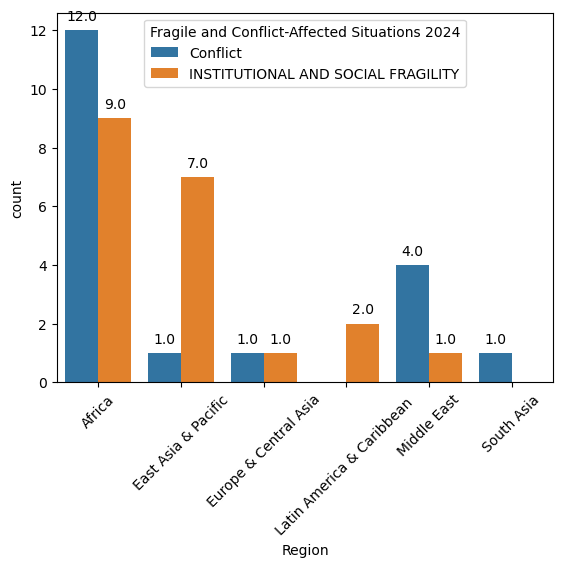

In [18]:
# Create a grouped bar chart to show distribution of conflict affected and fragile states by region
ax = sns.barplot(x='Region', y='count', hue='Fragile and Conflict-Affected Situations 2024', data=conflict_satatus_region)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()

In [19]:
conflict_satatus_african_sub_region= merged_df.groupby(['African_sub_region'])['Fragile and Conflict-Affected Situations 2024'].value_counts().reset_index()
conflict_satatus_african_sub_region.head()

,African_sub_region,Fragile and Conflict-Affected Situations 2024,count
0,Central Africa,INSTITUTIONAL AND SOCIAL FRAGILITY,4
1,Central Africa,Conflict,3
2,East Africa,Conflict,4
3,East Africa,INSTITUTIONAL AND SOCIAL FRAGILITY,2
4,Northern Africa,INSTITUTIONAL AND SOCIAL FRAGILITY,1


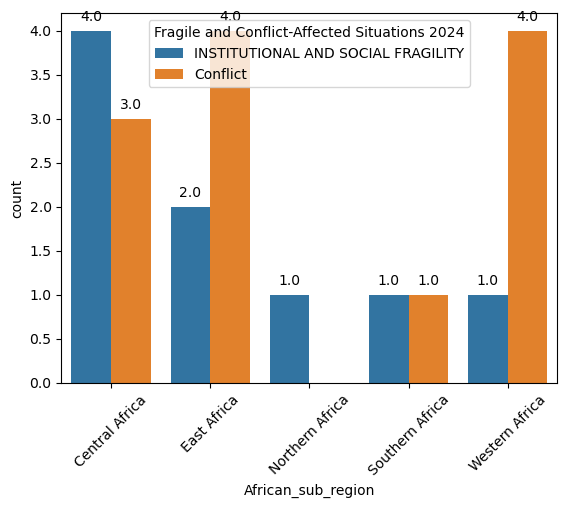

In [21]:
# Create a grouped bar chart to show distribution of conflict affected and fragile states by region

ax = sns.barplot(x='African_sub_region', y='count', hue='Fragile and Conflict-Affected Situations 2024', data=conflict_satatus_african_sub_region)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()

In [16]:
conflict_satatus = merged_df.groupby(['African_sub_region'])['Fragile and Conflict-Affected Situations 2024'].value_counts().reset_index()
conflict_satatus

,African_sub_region,Fragile and Conflict-Affected Situations 2024,count
0,Central Africa,INSTITUTIONAL AND SOCIAL FRAGILITY,4
1,Central Africa,Conflict,3
2,East Africa,Conflict,4
3,East Africa,INSTITUTIONAL AND SOCIAL FRAGILITY,2
4,Northern Africa,INSTITUTIONAL AND SOCIAL FRAGILITY,1
5,Southern Africa,Conflict,1
6,Southern Africa,INSTITUTIONAL AND SOCIAL FRAGILITY,1
7,Western Africa,Conflict,4
8,Western Africa,INSTITUTIONAL AND SOCIAL FRAGILITY,1


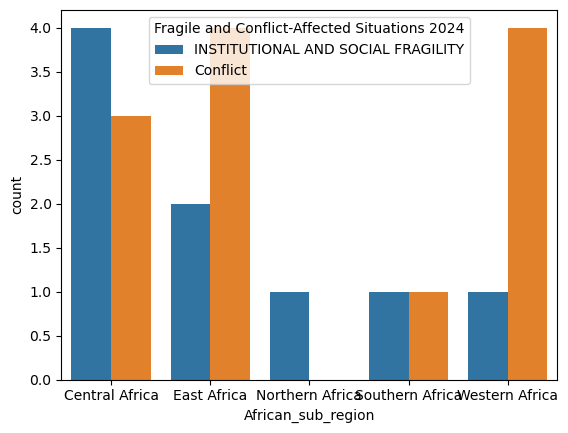

In [34]:
sns.barplot(x='African_sub_region', y= 'count', hue='Fragile and Conflict-Affected Situations 2024', data=conflict_satatus)
plt.show()